In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing the Libraries.
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
#import keras.backend as K
import tensorflow.keras.backend as K
import tensorflow.compat.v1 as tf
from os import listdir
from os.path import isfile, join
import numpy as np
import sys
import os
import shutil
import pandas as pd
from PIL import Image
import cv2
import keras
import glob
from PIL import Image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.models import load_model
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from PIL import ImageFile

tf.enable_eager_execution()

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Data Augmentation.
DataGenerator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255, brightness_range=[0.2,0.7])

In [ ]:
TestGenerator = ImageDataGenerator(rescale=1./255)

In [ ]:
Grey_TrainingData = DataGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Train/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 2788 images belonging to 68 classes.


In [ ]:
Grey_ValidData = TestGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Valid/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 136 images belonging to 68 classes.


In [ ]:
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [ ]:
from keras.applications import ResNet50

In [ ]:
conv_base = ResNet50(weights='imagenet', include_top = False)

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
for layer in conv_base.layers[:299]:
  layer.trainable = False
for layer in conv_base.layers[299:]:
  layer.trainable = True
for layer in conv_base.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True

print("Done")

Done


In [ ]:
for i, layer in enumerate(conv_base.layers):
   print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn True
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn True
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn True
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn True
16 conv2_block1_3_bn True
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn True
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn True
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn True
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn True
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn True
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn True
37 conv2_block3_add False
38 conv2_block3_out Fals

In [ ]:
model = Sequential()

In [ ]:
from keras.layers import Input 

In [ ]:
input_tensor = Input(shape=(224,224,1))
x = Conv2D(3,(3,3), padding='same')(input_tensor)

In [ ]:
out = conv_base(x)

In [ ]:
models = Model(inputs = input_tensor, outputs = out)

In [ ]:
model.add(models)

In [ ]:
model.add(Flatten())
model.add(Dense(2048, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(68, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 7, 7, 2048)        23587742  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 68)                139332    
Total params: 229,250,018
Trainable params: 205,715,426
Non-trainable params: 23,534,592
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/RawFoot_Image/RawFoot_Image_GreyScale_SGDResnet50.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 40,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 40,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = model.fit_generator(steps_per_epoch=349,generator= Grey_TrainingData, validation_data= Grey_ValidData, validation_steps=17,epochs=150,callbacks=callBacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/150
349/349 [==============================] - ETA: 0s - loss: 5.6945 - accuracy: 0.6367
Epoch 00001: val_loss improved from inf to 25.71587, saving model to /content/drive/My Drive/RawFoot_Image/RawFoot_Image_GreyScale_SGDResnet50.h5
349/349 [==============================] - 1144s 3s/step - loss: 5.6945 - accuracy: 0.6367 - val_loss: 25.7159 - val_accuracy: 0.0000e+00
Epoch 2/150
349/349 [==============================] - ETA: 0s - loss: 4.3656 - accuracy: 0.8967
Epoch 00002: val_loss improved from 25.71587 to 19.78912, saving model to /content/drive/My Drive/RawFoot_Image/RawFoot_Image_GreyScale_SGDResnet50.h5
349/349 [==============================] - 100s 285ms/step - loss: 4.3656 - accuracy: 0.8967 - val_loss: 19.7891 - val_accuracy: 0.0147
Epoch 3/150
349/349 [==============================] - ETA: 0s - loss: 4.1814 - accuracy: 0.9534
Epoch 00003: val_loss improved from 19.78912 to 7.58057, savin

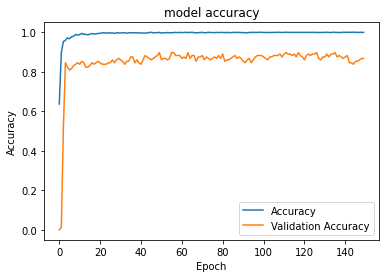

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

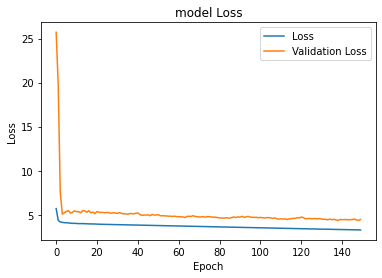

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
GreyTestData = TestGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Test/', target_size=(224,224), batch_size = 8, shuffle = False, color_mode='grayscale')

Found 204 images belonging to 68 classes.


In [ ]:
Grey_predict = model.predict(GreyTestData)

In [ ]:
Grey_predict_classes = np.argmax(Grey_predict, axis=1)

In [ ]:
Grey_predict_classes

array([ 0,  0,  0,  1,  1,  1,  2, 52, 52,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 52,
       52, 52, 52, 65, 65, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 60, 51, 25, 51, 26, 26, 26, 27, 27, 27, 28,
       28, 60, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
       34, 34, 34, 52, 65, 65, 36, 52, 36, 37, 52, 37, 38, 38, 38, 39, 16,
       39, 40, 40, 40, 20, 52, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45,
       45, 45, 46, 46, 46, 51, 51, 52, 48, 48, 48, 49, 49, 49, 50, 50, 50,
       51, 65, 51, 51, 51, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56,
       56, 57, 57, 57, 58, 58, 58, 59, 59, 15, 65, 52, 52, 61, 61, 61, 62,
       65, 62, 51, 51, 51, 64, 64, 64, 52, 65, 51, 66, 66, 66, 67, 67, 67])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [ ]:
Grey_accuracy = accuracy_score(GreyTestData.classes, Grey_predict_classes)
print("Grey Accuracy: ", Grey_accuracy)

Grey Accuracy:  0.8235294117647058


In [ ]:
Grey_precision = precision_score(GreyTestData.classes, Grey_predict_classes,average="weighted")
print("Grey Precision: ", Grey_precision)

Grey Precision:  0.8618872549019607


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Grey_recall = recall_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("Grey Recall:", Grey_recall)

Grey Recall: 0.8235294117647058


In [ ]:
Grey_f1_score = f1_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("F1 score for Grey: ", Grey_f1_score)

F1 score for Grey:  0.826926831338596


**Processing for colour Data.**

In [ ]:
Colour_TrainingData =  DataGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Train/', target_size=(224,224), batch_size=8)

Found 2788 images belonging to 68 classes.


In [ ]:
Colour_ValidData =  TestGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Valid/', target_size=(224,224), batch_size=8)

Found 136 images belonging to 68 classes.


In [ ]:
conv_base_colour = ResNet50(weights = 'imagenet', include_top = False, input_shape=(224,224,3))

In [ ]:
for layer in conv_base_colour.layers[:299]:
  layer.trainable = False
for layer in conv_base_colour.layers[299:]:
  layer.trainable = True
for layer in conv_base_colour.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True

print("Done")

Done


In [ ]:
for i, layer in enumerate(conv_base_colour.layers):
   print(i, layer.name, layer.trainable)

0 input_3 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn True
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn True
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn True
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn True
16 conv2_block1_3_bn True
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn True
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn True
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn True
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn True
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn True
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn True
37 conv2_block3_add False
38 conv2_block3_out Fals

In [ ]:
conv_base_colour.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
colour_model = Sequential()

In [ ]:
colour_model.add(conv_base_colour)

In [ ]:
colour_model.add(Flatten())

In [ ]:
colour_model.add(Dense(2048, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
colour_model.add(Dropout(0.5))
colour_model.add(Dense(68, activation='softmax'))

In [ ]:
colour_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              205522944 
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 68)                139332    
Total params: 229,249,988
Trainable params: 205,715,396
Non-trainable params: 23,534,592
_________________________________________________________________


In [ ]:
colour_model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/RawFoot_Image/RawFoot_Image_Colour_SGDResnet50.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 40,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 40,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = colour_model.fit_generator(steps_per_epoch=349,generator= Colour_TrainingData, validation_data= Colour_ValidData, validation_steps=17,epochs=150,callbacks=callBacks)

Epoch 1/150
349/349 [==============================] - ETA: 0s - loss: 5.6267 - accuracy: 0.6417
Epoch 00001: val_loss improved from inf to 17.54018, saving model to /content/drive/My Drive/RawFoot_Image/RawFoot_Image_Colour_SGDResnet50.h5
349/349 [==============================] - 96s 274ms/step - loss: 5.6267 - accuracy: 0.6417 - val_loss: 17.5402 - val_accuracy: 0.0147
Epoch 2/150
349/349 [==============================] - ETA: 0s - loss: 4.3393 - accuracy: 0.9082
Epoch 00002: val_loss improved from 17.54018 to 13.15501, saving model to /content/drive/My Drive/RawFoot_Image/RawFoot_Image_Colour_SGDResnet50.h5
349/349 [==============================] - 96s 276ms/step - loss: 4.3393 - accuracy: 0.9082 - val_loss: 13.1550 - val_accuracy: 0.0441
Epoch 3/150
349/349 [==============================] - ETA: 0s - loss: 4.2784 - accuracy: 0.9204
Epoch 00003: val_loss improved from 13.15501 to 4.94796, saving model to /content/drive/My Drive/RawFoot_Image/RawFoot_Image_Colour_SGDResnet50.h5
3

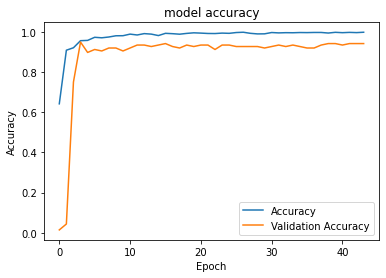

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

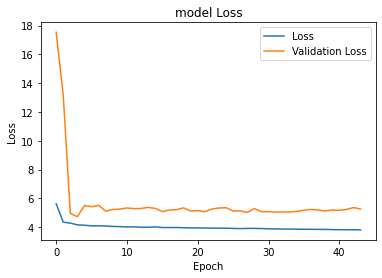

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
Colour_TestData = TestGenerator.flow_from_directory('/content/drive/My Drive/RawFoot_Image/Test/', target_size=(224,224), batch_size = 8, shuffle = False)

Found 204 images belonging to 68 classes.


In [ ]:
Colour_predict = colour_model.predict(Colour_TestData)

In [ ]:
Colour_predict_classes = np.argmax(Colour_predict, axis=1)

In [ ]:
Colour_predict_classes

array([ 0,  0,  0,  1,  1,  1,  2, 52, 38,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 38,
       52, 60, 52, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 49, 26, 26, 27, 27, 27, 28,
       28, 28, 29, 29, 29, 48, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
       34, 34, 34, 35, 35, 43, 36, 22, 36, 37, 37, 37, 38, 38, 38, 39, 16,
       39, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45,
       45, 45, 46, 46, 46, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50,
       51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56,
       56, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 60, 38, 61, 61, 61, 62,
       62, 62, 52, 63, 52, 64, 64, 64,  5, 65, 52, 66, 66, 66, 67, 67, 67])

In [ ]:
Colour_accuracy = accuracy_score(Colour_TestData.classes, Colour_predict_classes)
print("Colour Accuracy: ", Colour_accuracy)

Colour Accuracy:  0.9215686274509803


In [ ]:
Colour_precision = precision_score(Colour_TestData.classes, Colour_predict_classes,average="weighted")
print("Colour Precision: ", Colour_precision)

Colour Precision:  0.9411764705882353


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Colour_recall = recall_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("Colour Recall:", Colour_recall)

Colour Recall: 0.9215686274509803


In [ ]:
Colour_f1_score = f1_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("F1 score for colour: ", Colour_f1_score)

F1 score for colour:  0.9158263305322129


**Emsemble**

In [ ]:
Final = 0.6* Colour_predict + 0.4* Grey_predict

In [ ]:
Final_Predict_classes = np.argmax(Final, axis=1)

In [ ]:
Final_Predict_classes

array([ 0,  0,  0,  1,  1,  1,  2, 52, 52,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 38,
       52, 52, 52, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28,
       28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
       34, 34, 34, 35, 65, 43, 36, 52, 36, 37, 37, 37, 38, 38, 38, 39, 16,
       39, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45,
       45, 45, 46, 46, 46, 51, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50,
       51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56,
       56, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 60, 38, 61, 61, 61, 62,
       62, 62, 52, 63, 52, 64, 64, 64, 52, 65, 52, 66, 66, 66, 67, 67, 67])

In [ ]:
Final_accuracy = accuracy_score(Colour_TestData.classes, Final_Predict_classes)
print("Colour Accuracy: ", Final_accuracy)

Colour Accuracy:  0.9215686274509803


In [ ]:
Final_precision = precision_score(Colour_TestData.classes, Final_Predict_classes,average="weighted")
print("Colour Precision: ", Final_precision)

Colour Precision:  0.9497171945701357


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Final_recall = recall_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("Colour Recall:", Final_recall)

Colour Recall: 0.9215686274509803


In [ ]:
Final_f1_score = f1_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("F1 score for colour: ", Final_f1_score)

F1 score for colour:  0.9205357142857142


In [ ]:
Second_Final = 0.5* Colour_predict + 0.5 * Grey_predict

In [ ]:
Second_predict_classes = np.argmax(Second_Final, axis=1)

In [ ]:
Second_predict_classes

array([ 0,  0,  0,  1,  1,  1,  2, 52, 52,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 52,
       52, 52, 52, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 60, 25, 25, 51, 26, 26, 26, 27, 27, 27, 28,
       28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33,
       34, 34, 34, 35, 65, 65, 36, 52, 36, 37, 37, 37, 38, 38, 38, 39, 16,
       39, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45,
       45, 45, 46, 46, 46, 51, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50,
       51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56,
       56, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 60, 52, 61, 61, 61, 62,
       62, 62, 52, 51, 52, 64, 64, 64, 52, 65, 51, 66, 66, 66, 67, 67, 67])

In [ ]:
Second_Final_accuracy = accuracy_score(Colour_TestData.classes, Second_predict_classes)
Second_Final_accuracy

0.9068627450980392